# Задание
Компании заинтересованы в ответах на два вопроса:
1.   Будет ли кампания успешной?
2.   Если кампания была успешной, насколько этот успех можно объяснить рекламой?
Чтобы ответить на второй вопрос, мы обычно проводим A/B тестирование.

Большинство людей будут видеть рекламу (экспериментальная группа). А небольшая часть людей (контрольная группа) вместо этого увидит объявление государственной службы (PSA) (или ничего) точно такого же размера и в том же месте, где обычно находится реклама.

Идея задания состоит в том, чтобы проанализировать группы, выяснить, была ли реклама успешной, сколько компания может заработать на рекламе и является ли разница между группами статистически значимой.


**Словарь данных:**

* user id: Идентификатор пользователя (уникальный).
* test group: Если «ad», то человек видел рекламу, если «psa», то он видел только объявление государственной службы.
* converted: Если человек купил продукт, то True, иначе False.
* total ads: Количество рекламы, увиденной человеком.
* most ads day: День, в который человек увидел наибольшее количество рекламы.
* most ads hour: Час дня, в который человек увидел наибольшее количество рекламы.

<a id='home'></a>

В этом задании необходимо выполнить следующие действия:
1.    [Анализ структуры и предобработка данных](#cell-ixIaS7xOoxf7)

2.   [Первичный анализ результатов A/B-теста](#cell-Qd3qV9E3vM08)

3.   [Статистические тесты для анализа результатов A/B-теста](#cell-0aDP5--wa1GL)

4.   [Доверительные интервалы для анализа результатов A/B-теста](#cell-TkIsyeC8S76d)

5.   [Обобщённые итоги и вывод](#cell-z1jDEuWuM9_s)

6.   [Дополнительный анализ](#cell-lj4QU27qM9_t)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marketing_AB.csv to marketing_AB.csv


[↑наверх](#cell-qyni2CjeNBvh)

# 1. Анализ структуры и предобработка данных

In [ ]:
# Загрузим данные
df = pd.read_csv(io.BytesIO(uploaded['marketing_AB.csv']))
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [ ]:
# Проверим также конец таблицы
df.tail()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


In [ ]:
# Удалим ненужную колонку
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
# Переименуем заголовки колонок
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [ ]:
# Переконвертируем конверсию
df["converted"] = np.where(df["converted"] == True, 1, 0)

In [ ]:
# Размерность
df.shape

(588101, 6)

In [ ]:
# Обобщённая инфо
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        588101 non-null  int64 
 1   test_group     588101 non-null  object
 2   converted      588101 non-null  int64 
 3   total_ads      588101 non-null  int64 
 4   most_ads_day   588101 non-null  object
 5   most_ads_hour  588101 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 26.9+ MB


In [ ]:
df.describe(include="all")

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
count,5.881010e+05,588101,588101.000000,588101.000000,588101,588101.000000
unique,NaN,2,NaN,NaN,7,NaN
top,NaN,ad,NaN,NaN,Friday,NaN
freq,NaN,564577,NaN,NaN,92608,NaN
mean,1.310692e+06,NaN,0.025239,24.820876,NaN,14.469061
std,2.022260e+05,NaN,0.156850,43.715181,NaN,4.834634
min,9.000000e+05,NaN,0.000000,1.000000,NaN,0.000000
25%,1.143190e+06,NaN,0.000000,4.000000,NaN,11.000000
50%,1.313725e+06,NaN,0.000000,13.000000,NaN,14.000000
75%,1.484088e+06,NaN,0.000000,27.000000,NaN,18.000000


In [ ]:
# Проверка пропусков
df.isnull().sum()

user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

In [ ]:
# Проверка дубликатов
df.duplicated().sum()

0

In [ ]:
# Проверка повторов пользователей
df.duplicated(subset=["user_id"]).sum()

0

**Промежуточный вывод:** Все пользователи были уникальными и в разные группы не входили

Text(0.5, 0, 'Количество увиденной рекламы')

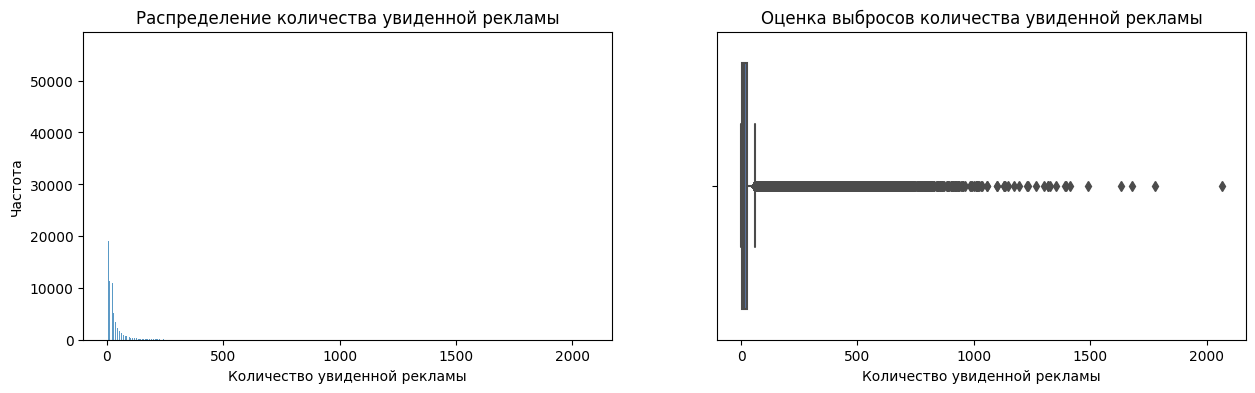

In [ ]:
# Визуализируем числовой признак total_ads:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
sns.set(style="whitegrid")

histplot = sns.histplot(data=df, x="total_ads", ax=axes[0])
histplot.set_title("Распределение количества увиденной рекламы")
histplot.set_ylabel("Частота")

histplot.set_xlabel("Количество увиденной рекламы")
boxplot = sns.boxplot(data=df, x="total_ads", ax=axes[1])
boxplot.set_title("Оценка выбросов количества увиденной рекламы")
boxplot.set_xlabel("Количество увиденной рекламы")

In [ ]:
# Функция для выявления и удаления выбросов
def outliers_iqr(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]

    quartile_1, quartile_3 = (
        x.quantile(0.25),
        x.quantile(0.75),
    )
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return cleaned

In [ ]:
# Удалим выбросы справа
cleaned_df = outliers_iqr(df, "total_ads", 0, 1.5, False)

Text(0.5, 0, 'Количество увиденной рекламы')

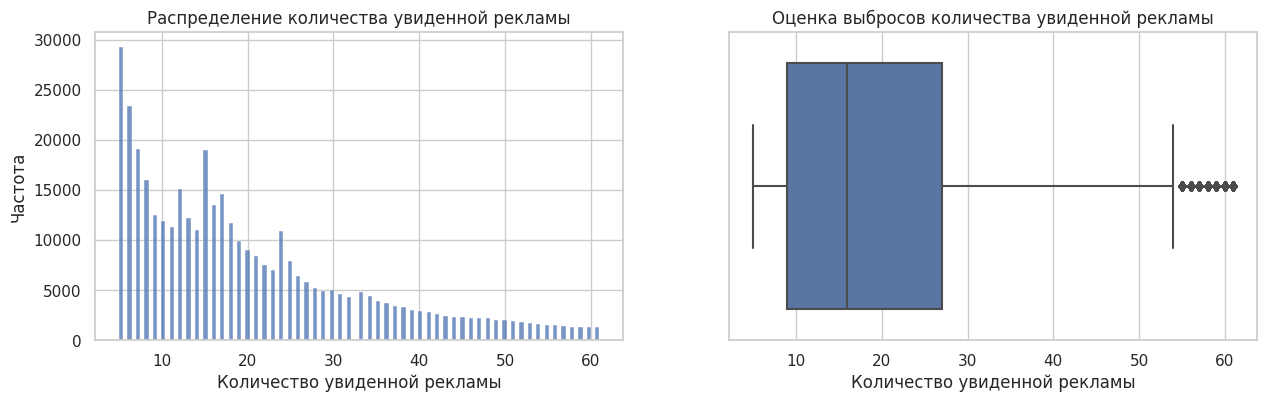

In [ ]:
# Визуализируем числовой признак total_ads в новой таблице:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot = sns.histplot(data=cleaned_df, x="total_ads", ax=axes[0])
histplot.set_title("Распределение количества увиденной рекламы")
histplot.set_xlabel("Количество увиденной рекламы")
histplot.set_ylabel("Частота")

boxplot = sns.boxplot(data=cleaned_df, x="total_ads", ax=axes[1])
boxplot.set_title("Оценка выбросов количества увиденной рекламы")
boxplot.set_xlabel("Количество увиденной рекламы")

**Промежуточный итог:** В показателе «количество увиденной рекламы» были выявлены и удалены выбросы.

[↑наверх](#cell-qyni2CjeNBvh)

# 2. Первичный анализ результатов A/B-теста

In [ ]:
# Таблица посетителей сайта и покупок
users_data = (
    cleaned_df.groupby(["test_group"])
    .agg({"user_id": "count", "total_ads": "sum", "converted": "sum"})
    .reset_index()
    .rename(columns={"user_id": "users_count"})
)
users_data

,test_group,users_count,total_ads,converted
0,ad,372778,7501283,6554
1,psa,14746,295268,213


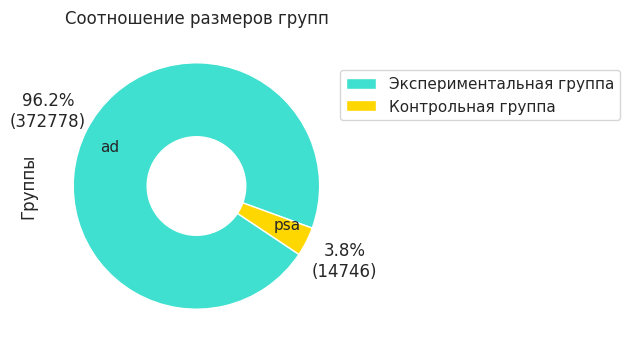

In [ ]:
# Пайчарт для визуализации структуры групп

fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(aspect="equal"))


def func(pct, allvals):
    absolute = int(np.round(pct / 100.0 * np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"


ax = users_data["users_count"].plot.pie(
    wedgeprops=dict(width=0.6),
    pctdistance=1.35,
    labeldistance=0.7,
    labels=["ad", "psa"],
    autopct=lambda pct: func(pct, users_data["users_count"]),
    startangle=-20,
    colors=["turquoise", "gold"],
)

ax.set_title("Соотношение размеров групп")
ax.set_ylabel("Группы")
ax.legend(
    loc="upper right",
    bbox_to_anchor=(1.4, -0.1, 0.5, 1),
    labels=["Экспериментальная группа", "Контрольная группа"],
)
plt.show()

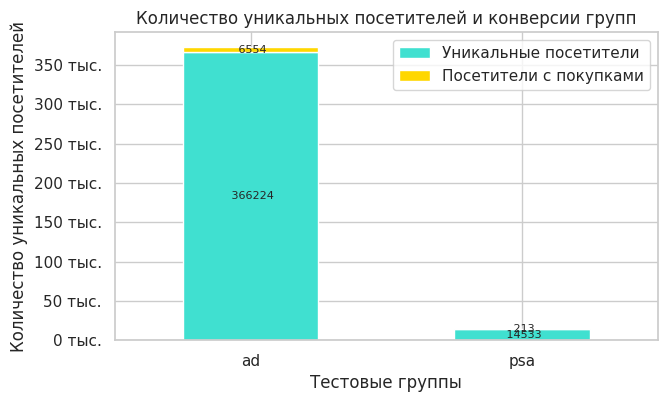

In [ ]:
from matplotlib import ticker
from matplotlib.ticker import StrMethodFormatter

# Визуализация количества уникальных посетителей и конверсии
ax = (
    cleaned_df.groupby("converted")["test_group"]
    .value_counts()
    .unstack("converted")
    .plot(
        kind="bar",
        figsize=(7, 4),
        stacked=True,
        color=["turquoise", "gold"],
    )
)
ax.set_title("Количество уникальных посетителей и конверсии групп")
ax.set_ylabel("Количество уникальных посетителей")
ax.set_xlabel("Тестовые группы")
ax.tick_params(rotation=0)
ax.legend(loc="upper right")
for i in ax.containers:
    ax.bar_label(
        i, labels=[f"{x: .0f}" for x in i.datavalues],
        label_type="center", size=8
    )
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: format(x / 1000, "1.0f") + " тыс.")
)
ax.legend(labels=["Уникальные посетители", "Посетители с покупками"])

plt.show()

**Промежуточный вывод**: рассчитаны вспомогательные показатели для контрольной и тестовой групп (количество уникальных посетителей сайта, количество просмотренной рекламы и суммарное количество совершённых покупок).
Согласно рассчётам:
*   Количество посещений обоих вариантов посадочной страницы не является сопоставимым
*   Выборки не являются сбалансированными

In [ ]:
# Таблица среднего количества увиденной рекламы и конверсии
ads_data = users_data[
    [
        "test_group",
    ]
].copy()
ads_data["avg_ads"] = users_data["total_ads"] / users_data["users_count"]
ads_data["converted"] = users_data["converted"] / users_data["users_count"]
ads_data["conv_rate"] = users_data["converted"] / users_data["users_count"] * 100
ads_data.head()

,test_group,avg_ads,converted,conv_rate
0,ad,20.122655,0.017582,1.758151
1,psa,20.023600,0.014445,1.444460


In [ ]:
print(
    "Арифметическая разница конверсий %.4f"
    % (ads_data["conv_rate"].iloc[0] - ads_data["conv_rate"].iloc[1])
)

Арифметическая разница конверсий 0.3137


**Промежуточный вывод:** в каждой из групп рассчитаны ключевые показатели (среднее количество увиденной рекламы и конверсия). На основе этих данных:
*   Конверсия экспериментальной группы («ad»), несколько выше чем в контрольной группе («psa»)
*   Среднее количество увиденной рекламы в обеих группах примерно одинаковое

Таким образом, на первый взгляд, можно предположить, что при почти одинаковом среднем количестве увиденной рекламы, по показателю конверсии рекламная кампания в группе «ad» эффективнее, чем в группе «psa».

[↑наверх](#cell-qyni2CjeNBvh)

# 3. Статистические тесты для анализа результатов A/B-теста

## 3.1. Конверсия

Поскольку нас интересует успешность рекламной кампании, относительно конверсии будем формулировать следующие гипотезы:

*   $H_0:$ конверсия в группе рекламы (ad) равна или меньше конверсии в группе объявления госслужбы (psa)
*   $H_1:$ конверсия в группе рекламы (ad) выше конвесии в группе объявления госслужбы (psa)


In [ ]:
# Таблица конверсий и уникальных пользователей для каждой группы:
converted_piv = cleaned_df.groupby("test_group")["converted"].agg(["sum", "count"])
converted_piv

,sum,count
test_group,,
ad,6554,372778
psa,213,14746


In [ ]:
# Применим Z-тест для пропорций
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05  # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
test_stat, p_value = proportions_ztest(
    count=converted_piv["sum"],  # число конверсий
    nobs=converted_piv["count"],  # количество уникальных пользователей
    alternative="larger",
)
# выводим результат на экран
print("Статистика: %.4f, p-value: %.4f" % (test_stat, p_value))
# сравниваем полученное p-value с уровнем значимости
if p_value <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

Статистика: 2.8523, p-value: 0.0022
Отвергаем нулевую гипотезу в пользу альтернативной


**Промежуточный итог:** Согласно выполненному статистическому тесту, конверсия в группе рекламы (ad) выше, чем в группе объявления госслужбы (psa). Разница является статистически значимой.

## 3.2. Cреднее количество увиденной рекламы

Сформулируем гипотезу
*   $H_0:$ Среднее количество увиденной рекламы в группе «ad» и в группе «psa» одинаково
*   $H_1:$ Среднее количество увиденной рекламы в группе «ad» и в группе «psa» имеет различия


In [ ]:
# Разделим группы
df_ad = cleaned_df.loc[df["test_group"] == "ad"].reset_index(drop=True)
df_psa = cleaned_df.loc[df["test_group"] == "psa"].reset_index(drop=True)

In [ ]:
# Поскольку размер выборки >5000, тест Шапиро-Уилка будет неточным,
# поэтому выполним тест Колмогорова-Смирнова
from scipy.stats import kstest


def kstest_perform(data):
    test_result = kstest(data, "norm")
    output = "тест Колмогорова-Смирнова: "
    output += "cтатистика %.4f, p-value %.4f" % test_result
    output += "\nРаспределение: "
    output += f"{'нормальное' if test_result[1] > 0.05 else 'не нормальное'}\n"
    return output


# Проверка на нормальное распределение количества увиденной рекламы группы «ad»
print("Группа «ad»,", kstest_perform(df_ad["total_ads"]))

# Проверка на нормальное распределение количества увиденной рекламы группы «psa»
print("Группа «psa»,", kstest_perform(df_psa["total_ads"]))

Группа «ad», тест Колмогорова-Смирнова: cтатистика 1.0000, p-value 0.0000
Распределение: не нормальное

Группа «psa», тест Колмогорова-Смирнова: cтатистика 1.0000, p-value 0.0000
Распределение: не нормальное



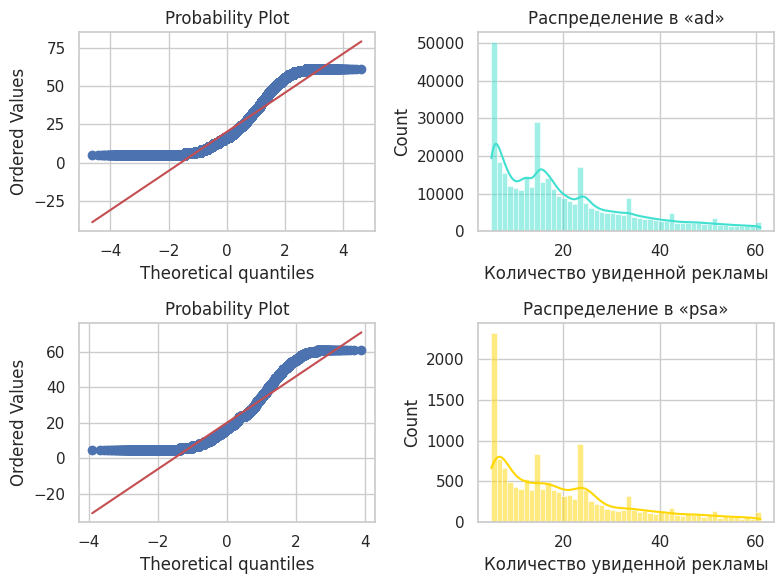

In [ ]:
# Построим QQ-plots
from scipy.stats import probplot

plt.figure(figsize=[8, 6])
plt.subplot(2, 2, 1)
probplot(df_ad["total_ads"], dist="norm", plot=plt)
plt.subplot(2, 2, 2)
histplot_ad = sns.histplot(df_ad["total_ads"], bins=50, kde=True, color="turquoise")
histplot_ad.set_title("Распределение в «ad»")
histplot_ad.set_xlabel("Количество увиденной рекламы")
plt.subplot(2, 2, 3)
probplot(df_psa["total_ads"], dist="norm", plot=plt)
plt.subplot(2, 2, 4)
histplot_psa = sns.histplot(df_psa["total_ads"], bins=50, kde=True, color="gold")
histplot_psa.set_title("Распределение в «psa»")
histplot_psa.set_xlabel("Количество увиденной рекламы")


plt.tight_layout()
plt.show()

**Промежуточный итог:** Распределение количества увиденной рекламы в обеих группах не подчиняется закону нормального распределения. Таким образом, мы не можем использовать статистические критерии для нормального распределения. Рассмотрим меру центральной тенденции и интервальную оценку для данных, распределение которых отлично от нормального (Me [Q1-Q3]).

In [ ]:
print(
    "Количество увиденной рекламы в группе «ad»: %.2f [%.2f-%.2f]"
    % (
        df_ad["total_ads"].median(),
        df_ad["total_ads"].quantile(0.25),
        df_ad["total_ads"].quantile(0.75),
    )
)
print(
    "Количество увиденной рекламы в группе «psa»: %.2f [%.2f-%.2f]"
    % (
        df_psa["total_ads"].median(),
        df_psa["total_ads"].quantile(0.25),
        df_psa["total_ads"].quantile(0.75),
    )
)

Количество увиденной рекламы в группе «ad»: 16.00 [9.00-27.00]
Количество увиденной рекламы в группе «psa»: 17.00 [8.00-26.00]


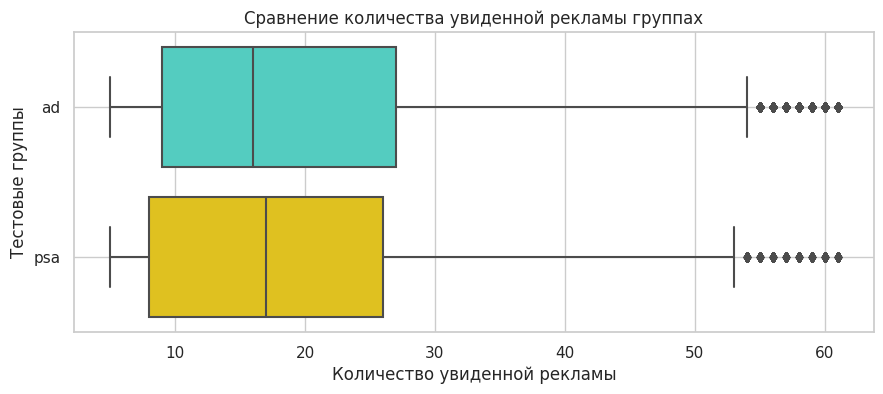

In [ ]:
# Сравнение количества увиденной рекламы группах
fig = plt.figure(figsize=(8, 3))
ax = fig.add_axes([1, 1, 1, 1])
sns.boxplot(
    data=cleaned_df, x="total_ads", y="test_group", ax=ax, palette=["turquoise", "gold"]
)
ax.set_title("Сравнение количества увиденной рекламы группах")
ax.set_ylabel("Тестовые группы")
ax.set_xlabel("Количество увиденной рекламы")
ax.grid(True)

Применим непараметрический тест для сравнения двух независимых выборок, сформулировав для этого соответствующие гипотезы:

*   $H_0:$ Распределение лежащее в основе количества увиденной рекламы в группе «ad» и в группе «psa» идентично
*   $H_1:$ Распределение лежащее в основе количества увиденной рекламы в группе «ad» и в группе «psa» имеет различия

In [ ]:
from scipy.stats import mannwhitneyu

alpha = 0.05  # уровень значимости

# вычисляем результат теста Манна — Уитни для выборок
test_stat, p_value = mannwhitneyu(
    x=df_ad["total_ads"],
    y=df_psa["total_ads"],
    alternative="two-sided",
)
print("Статистика: %.4f, p-value: %.4f" % (test_stat, p_value))

# сравниваем полученное p-value с уровнем значимости
if p_value <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

Статистика: 2781699320.5000, p-value: 0.0126
Отвергаем нулевую гипотезу в пользу альтернативной


In [ ]:
# Для уточнения направления различя проведём тест снова
test_stat, p_value = mannwhitneyu(
    x=df_ad["total_ads"],
    y=df_psa["total_ads"],
    alternative="greater",
)
print("Статистика: %.4f, p-value: %.4f" % (test_stat, p_value))

# сравниваем полученное p-value с уровнем значимости
if p_value <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

Статистика: 2781699320.5000, p-value: 0.0063
Отвергаем нулевую гипотезу в пользу альтернативной


**Промежуточный вывод:** Согласно полученным результатам, количество увиденной рекламы в группе рекламы (ad) отличается от количества увиденный объявлений группе объявления госслужбы (psa). В экспериментальной группе пользователи видели больше рекламы.

[↑наверх](#cell-qyni2CjeNBvh)

# 4. Доверительные интервалы для анализа результатов A/B-теста

## 4.1. Доверительные интервалы для конверсий в каждой из групп

In [ ]:
# Строим 95% доверительные интервалы для конверсии

from statsmodels.stats.proportion import proportion_confint

conf_intervals_ad = proportion_confint(
    sum(df_ad["converted"]), df_ad["user_id"].count(), method="wilson"
)
conf_intervals_psa = proportion_confint(
    sum(df_psa["converted"]), df_psa["user_id"].count(), method="wilson"
)

print(
    "95% доверительный интервал для конверсии в группе «ad»:",
    "[%.4f, %.4f]" % (conf_intervals_ad[0] * 100, conf_intervals_ad[1] * 100),
)

print(
    "95% доверительный интервал для конверсии в группе «psa»:",
    "[%.4f, %.4f]" % (conf_intervals_psa[0] * 100, conf_intervals_psa[1] * 100),
)

95% доверительный интервал для конверсии в группе «ad»: [1.7165, 1.8008]
95% доверительный интервал для конверсии в группе «psa»: [1.2641, 1.6501]


**Промежуточный вывод**: Доверительные интервалы конверсии не перекрываются, значит различия конверсий являются значимыми. В группе эксперимента («ad») кампания была успешнее, чем в группе контроля («psa»).

## 4.2. Доверительный интервал для разницы конверсий

In [ ]:
from scipy.stats import norm


# Функция для построения доверительного интервала для разницы пропорций конверсии
def proportions_diff_conf_ind(sample1, sample2, alpha=0.05):
    z = norm.ppf(1 - alpha / 2.0)  # z-критическое

    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)

    diff = p1 - p2  # выборочная разница групп
    eps = z * np.sqrt(
        p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2)
    )  # погрешность

    left_boundary = diff - eps  # левая граница
    right_boundary = diff + eps  # правая граница

    return (left_boundary, right_boundary)

In [ ]:
# Cтроим доверительный интервал для разности пропорций конверсии
conf_intervals_diff = proportions_diff_conf_ind(
    df_ad["converted"], df_psa["converted"], 0.05
)
# выводим результат
print(
    "95% доверительный интервал для разницы конверсий:",
    "[%.4f, %.4f]" % (conf_intervals_diff[0] * 100, conf_intervals_diff[1] * 100),
)

95% доверительный интервал для разницы конверсий: [0.1165, 0.5108]


**Промежуточный вывод:** Вероятность того, что доверительный интервал [0.1165, 0.5108] содержит истинную разницу коверсий, составляет 95%. Разница конверсий (0.3137) попадает в границы доверительного интервала.

## 4.3. Доверительные интервалы для среднего количества увиденной рекламы

<font color = #cc0000>DISCALMER: Согласно формулировке задания, а также комментарию преподавателя на очном семинаре, доверительные интервалы требуется строить именно вокруг среднего значения, несмотря на то, что данные по показателю количества увиденной рекламы не подчиняется закону нормального распределения.</font>

In [ ]:
# Средние значения
print(
    "Среднее количество увиденной рекламы в группе «ad»: %.2f"
    % (df_ad["total_ads"].mean())
)
print(
    "Среднее количество увиденной рекламы в группе «psa»: %.2f"
    % (df_psa["total_ads"].mean())
)

Среднее количество увиденной рекламы в группе «ad»: 20.12
Среднее количество увиденной рекламы в группе «psa»: 20.02


In [ ]:
# Функция для создания репликаций
def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [ ]:
# Фукция для множественных бутстреп репликаций
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

In [ ]:
# Выполняем бутстреп для группы «ad»
bs_means_ad = draw_bs_reps(df_ad["total_ads"], np.mean, size=10000)

# Выполняем бутстреп для группы «psa»
bs_means_psa = draw_bs_reps(df_psa["total_ads"], np.mean, size=10000)

In [ ]:
# Строим доверительные интервалы для среднего группы «ad»
ci_ad = np.percentile(bs_means_ad, [2.5, 97.5])
print("ДИ для среднего группы «ad»: %.2f-%.2f" % (ci_ad[0], ci_ad[1]))

# Строим доверительные интервалы для среднего группы «psa»
ci_psa = np.percentile(bs_means_psa, [2.5, 97.5])
print("ДИ для среднего группы «psa»: %.2f-%.2f" % (ci_psa[0], ci_psa[1]))

ДИ для среднего группы «ad»: 20.08-20.17
ДИ для среднего группы «psa»: 19.80-20.24


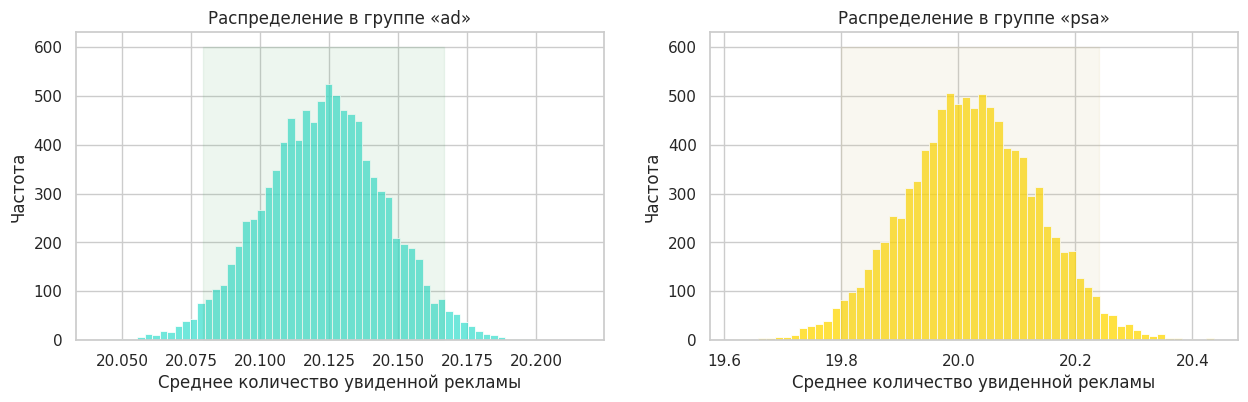

In [ ]:
# Визуализируем гистограммы:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot_ad = sns.histplot(data=bs_means_ad, ax=axes[0], color="turquoise")
histplot_ad.set_title("Распределение в группе «ad»")
histplot_ad.set_xlabel("Среднее количество увиденной рекламы")
histplot_ad.set_ylabel("Частота")
histplot_ad.fill_betweenx([0, 600], ci_ad[0], ci_ad[1], color="g", alpha=0.1)

histplot_psa = sns.histplot(data=bs_means_psa, ax=axes[1], color="gold")
histplot_psa.set_title("Распределение в группе «psa»")
histplot_psa.set_xlabel("Среднее количество увиденной рекламы")
histplot_psa.set_ylabel("Частота")
histplot_psa.fill_betweenx([0, 600], ci_psa[0], ci_psa[1], color="y", alpha=0.1)

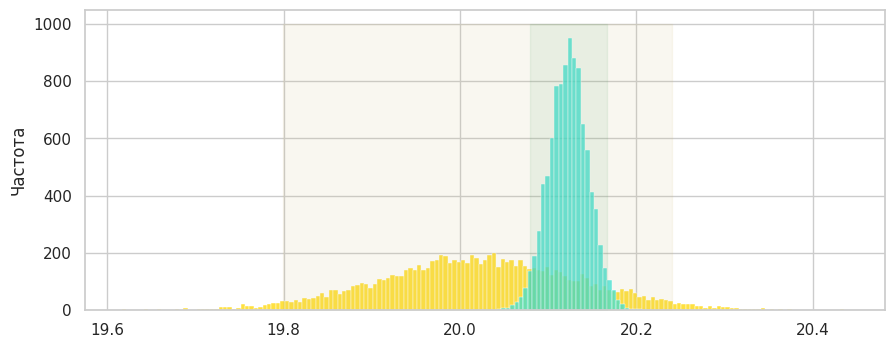

In [ ]:
# Визуализируем перекрытие:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_axes([1, 1, 1, 1])
histplot_psa = sns.histplot(data=bs_means_psa, binwidth=0.005, color="gold")
histplot_psa.fill_betweenx([0, 1000], ci_psa[0], ci_psa[1], color="y", alpha=0.1)
histplot_ad = sns.histplot(data=bs_means_ad, binwidth=0.005, color="turquoise")
histplot_ad.fill_betweenx([0, 1000], ci_ad[0], ci_ad[1], color="g", alpha=0.1)
histplot_psa.set_ylabel("Частота")
plt.show()

**Промежуточный вывод:** Наблюдаются перекрытия доверительных интервалов. Таким образом, мы не можем говорить о том, что количество увиденной рекламы в группе рекламы (ad) отличается от количества увиденный объявлений группе объявления госслужбы (psa).

[↑наверх](#cell-qyni2CjeNBvh)

# Обобщённые итоги и вывод

In [ ]:
# Прежде чем делать окончательные выводы, рассчитаем размер эффекта
cohens_d = (df_ad["converted"].mean() - df_psa["converted"].mean()) / (
    np.sqrt((df_ad["converted"].std() ** 2 + df_psa["converted"].std() ** 2) / 2)
)
print("Размер эффекта: %.2f" % (cohens_d))

Размер эффекта: 0.02


## 1.  Проведён анализ структуры и предобработка данных

Было выявлено, что все пользователи были уникальными, одни и те же пользователи не могли входить одноврененно в разные группы A/B-теста.


## 2. Выполнен первичный анализ результатов A/B-тестирования

Рассчитаны вспомогательные показатели для контрольной и тестовой групп — количество уникальных посетителей сайта, количество просмотренной рекламы и суммарное количество совершённых покупок. В экспериментальной группе (ad) было 372778 уникальных пользователей, 7501283 просмотров рекламы и 6554 соврешенных покупок.В контрольной группе (psa) было 14746 уникальных пользователей, 295268 просмотров рекламы и 213 соврешенных покупок.
    
Согласно рассчётам, было выявлено, что:
* Количества посещений обоих вариантов посадочной страницы не являются сопоставимыми
* Выборки не являются сбалансированными
    
Также в каждой из групп рассчитаны ключевые показатели среднее количество увиденной рекламы и конверсия. В экспериментальной группе (ad) в среднем пользователи видели рекламу 20.12 раз, покупки совершили 1.76% посетителей. В контрольной группе (psd) в среднем пользователи видели рекламу 20.02 раза, покупки совершили 1.44% посетителей. На основе этих данных можно предположить, что:

* Конверсия экспериментальной группы («ad»), несколько выше чем в контрольной группе («psa»)
* Среднее количество увиденной рекламы в обеих группах примерно одинаковое

Таким образом, на первый взгляд, можно предположить, что при почти одинаковом среднем количестве увиденной рекламы, по показателю конверсии рекламная кампания в группе «ad» эффективнее, чем в группе «psa».


## 3. Проведён статистический анализ результатов A/B-тестирования

#### 3.1. Конверсия
Поскольку нас интересовала успешность рекламной кампании, были формулировать следующие гипотезы:
* $H_0:$ конверсия в группе рекламы (ad) равна или меньше, чем конверсия в группе объявления госслужбы (psa)
* $H_1:$ конверсия в группе рекламы (ad) выше конверсии в группе объявления госслужбы (psa)

Согласно выполненному статистическому тесту, конверсия в группе рекламы (ad) оказалась статистически значимо выше, чем в группе объявления госслужбы (psa).
    
#### 3.2. Количество увиденной рекламы группах
Сформулированы гипотезы:
* $H_0:$ Среднее количество увиденной рекламы в группе «ad» и в группе «psa» одинаково
* $H_1:$ Среднее количество увиденной рекламы в группе «ad» и в группе «psa» имеет различия

Поскольку имеем дело с количественными данными, для выбора статистического критерия, были выполнены тесты проверки на нормальное распрделение. Поскольку данные не подчинялись закону нормального распределения, было принято решение о применении непараметрического теста и об использовании меры центральной тенденции и интервальной оценки для данных, распределение которых отлично от нормального (Me [Q1-Q3]). Таки образом, количество увиденной рекламы в группе «ad» составило 16.00 [9.00-27.00], а в группе «psa»: 17.00 [8.00-26.00]. Выявлено, что группе «ad» медианное значение меньше, чем в группе «psa», однако межквартильный размах в группе «ad» расположен в более высоких значениях.
    
Для применения теста Манна-Уитни для независимых были сформулированы гипотезы:
*   $H_0:$ Распределение лежащее в основе количества увиденной рекламы в группе «ad» и в группе «psa» идентично
*   $H_1:$ Распределение лежащее в основе количества увиденной рекламы в группе «ad» и в группе «psa» имеет различия

Согласно полученным результатам, количество увиденной рекламы в группе рекламы (ad) отличается от количества увиденный объявлений группе объявления госслужбы (psa). При выполнении повторного теста Манна-Уитни с односторонней гипотезой было выявлено, что в экспериментальной группе пользователи видели стастически значимо больше рекламы.
    
    

## 4. Построены доверительные интервалы для анализа результатов A/B-теста

#### 4.1. Доверительные интервалы для конверсий в каждой из групп.
95% ДИ для конверсии в группе «ad»: [1.7165, 1.8008], в группе «psa»: [1.2641, 1.6501]. Доверительные интервалы конверсии групп не перекрываются, значит различия конверсий являются значимыми. В группе эксперимента («ad») кампания была успешнее, чем в группе контроля («psa»).

#### 4.2. Доверительный интервал для разницы конверсий.
С веротяностью 95% доверительный интервал [0.1165, 0.5108] содержит истинную разницу средней коверсии. Разница конверсий между группами (0.3137) попадает в границы доверительного интервала.
    
#### 4.3. Доверительные интервалы для среднего количества увиденной рекламы.
95% ДИ для конверсии в группе «ad»: [20.08-20.17], в группе «psa»: [19.80-20.25]. Выявлено, что доверительные интервалы перекрываются. Таким образом, мы не можем говорить о том, что количество увиденной рекламы в группе рекламы (ad) отличается от количества увиденный объявлений группе объявления госслужбы (psa).

## ВЫВОДЫ

Согласно оценке конверсии по результатам анализа проведённого теста, рекламаная кампания была успешной. Однако относительно среднего количества просмотренной рекламы получены противоречивые данные, которые не позволяют до конца ислючать то, что успех рекламной кампании связан с тем, что участники экспериментальной группы просмотрели больше рекламы.
Кроме того, рассчитанная величина размера эффекта оказалась маленькой.

Таким образом, немотря на успех рекламной кампании, мы вынуждены сообщить, что для более уверенных выводов требуются дополнительные тесты.

[↑наверх](#cell-qyni2CjeNBvh)

# Дополнительный анализ

<Figure size 800x400 with 0 Axes>

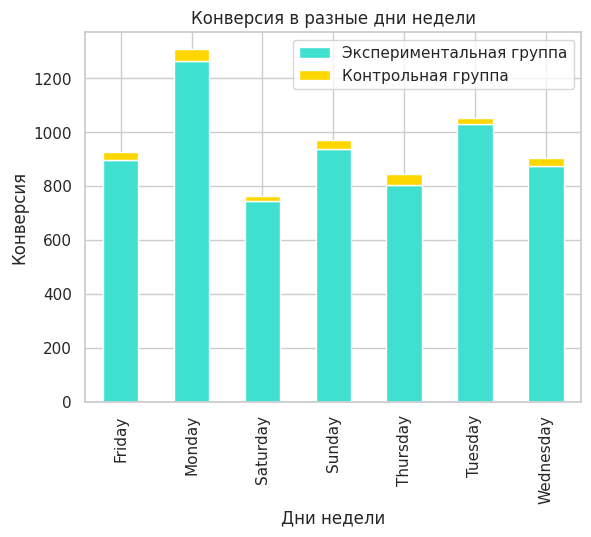

In [ ]:
# Визуализируем конверсию по дням недели
fig = plt.figure(figsize=(8, 4))
ax = (
    cleaned_df.groupby(by=["most_ads_day", "test_group"])
    .sum()["converted"]
    .unstack("test_group")
    .plot(kind="bar", color=["turquoise", "gold"], stacked=True)
)
ax.legend(
    loc="upper right",
    labels=["Экспериментальная группа", "Контрольная группа"],
)
ax.set_ylabel("Конверсия")
ax.set_xlabel("Дни недели")
ax.set_title("Конверсия в разные дни недели")
plt.show()

<ipython-input-50-48f64e09255b>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cleaned_df.groupby(by=["most_ads_hour", "test_group"]).sum()["converted"]


<Figure size 800x400 with 0 Axes>

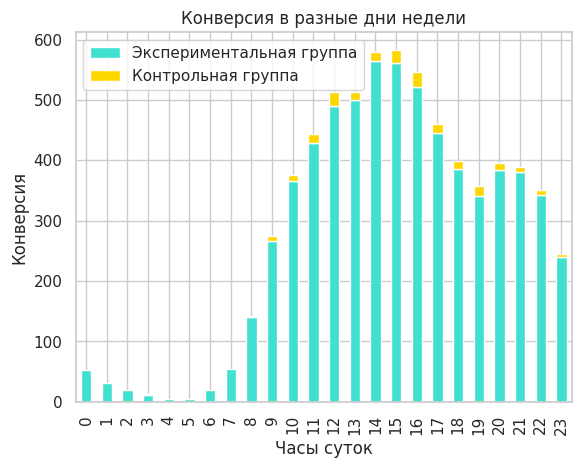

In [ ]:
# Визуализируем конверсию по часам суток
fig = plt.figure(figsize=(8, 4))
ax = (
    cleaned_df.groupby(by=["most_ads_hour", "test_group"]).sum()["converted"]
    .unstack("test_group")
    .plot(kind="bar", color=["turquoise", "gold"], stacked=True)
);
ax.legend(
    loc="upper left",
    labels=["Экспериментальная группа", "Контрольная группа"],
)
ax.set_ylabel("Конверсия")
ax.set_xlabel("Часы суток")
ax.set_title("Конверсия в разные дни недели")
plt.show()

**Дополнительные выводы:** Наибольшая конверсия суммарно в обеих группах наблюдается в понедельник. В течение суток, в среднем наибольшая конверсия наблюдается в дневное время, с 12 до 16 часов.